# Chapter 01
# Chapter 02
# Chapter 03
# Chapter 04
# Chapter 05
# Chapter 06
# Chapter 07
# Chapter 08
# Chapter 09
# Chapter 10

# Chapter 11 - Model Evaluation

## Cross-Validating Models

In [11]:
# Load libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load digits dataset
digits = datasets.load_digits()

In [9]:
# Create feature matrix
features = digits.data

# Create target vector
target = digits.target

# Create standardizer
standardizer = StandardScaler()

# Create logistic regression object
logit = LogisticRegression()

# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)

# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Conduct k-Fold cross-validation
cv_results = cross_val_score(pipeline, #Pipeline
                             features, # Features matrix
                             target, # Target vector
                             cv=kf, # cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU cores

# Calculate mean
cv_results.mean()

0.964931719428926

It is often beneficial to have folds containing roughly the same percentage of observations from each of the different target classes. For example, if our target vector contained gender and 80% of the observations were male, then each fold would contain 80% male and 20% female observations.

This can be done with, **Stratified K Fold**

In [12]:
# Create feature matrix
features = digits.data

# Create target vector
target = digits.target

# Create standardizer
standardizer = StandardScaler()

# Create logistic regression object
logit = LogisticRegression()

# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)

# Create k-Fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Conduct k-Fold cross-validation
cv_results = cross_val_score(pipeline, #Pipeline
                             features, # Features matrix
                             target, # Target vector
                             cv=kf, # cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU cores

# Calculate mean
cv_results.mean()

0.9649101481756478

Finally, it is important to preprocess data based on the training set and then apply those transformations to both the training and test set. For example, when we **fit** our standardization object, **standardizer**, we calculate the mean and variance of only the training set. Then we apply that transformation(using transform) to both the training and test sets:

In [13]:
# import library
from sklearn.model_selection import train_test_split

# Create training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

# Fit standardizer to training set
standardizer.fit(features_train)

# Apply to both training and test sets
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

## Creating a Baseline Regression Model

In [23]:
# Load libraries
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# Load data
boston = load_boston()

# Create features
features, target = boston.data, boston.target

# Make test and training split
features_train, features_test, target_train, target_test = train_test_split(
                                                            features, target, random_state=0)

# Create a dummy regressor
dummy= DummyRegressor(strategy='mean')

# Train a dummy regressor
dummy.fit(features_train, target_train)

# Get R-squared score
dummy.score(features_test, target_test)

-0.001119359203955339

In [24]:
# load library
from sklearn.linear_model import LinearRegression

# train simple linear regression model
ols = LinearRegression()
ols.fit(features_train, target_train)

# get r-squared score
ols.score(features_test, target_test)

0.6354638433202124

If we sey strategy to constant and use the constant parameter, we can set the dummy regressor to predict some constant value for every observation.

In [25]:
# Create dummy regressor that predicts 20's for everything
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train, target_train)

# Evaluate score
clf.score(features_test, target_test)

-0.06510502029325727

Score, returns the coefficient of determination

## Creating a Baseline Classification Model

In [50]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# Load data
iris = load_iris()

# Create target vector and feature matrix
features, target = iris.data, iris.target

# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(
                                                            features, target, random_state=0)
# Create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)

# Train model
dummy.fit(features_train, target_train)

# Get accuracy score
dummy.score(features_test, target_test)

0.42105263157894735

In [54]:
# Load library
from sklearn.ensemble import RandomForestClassifier

# Create classifier
classfier = RandomForestClassifier()

# Train model
classfier.fit(features_train, target_train)

# get acc score
classfier.score(features_test, target_test)

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9736842105263158

## Evaluating Binary Classifier Predictions

$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $

In [60]:
# Load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate features matrix and target vector
X, y =make_classification(n_samples=10000,
                          n_features=3,
                          n_informative=3,
                          n_redundant=0,
                          n_classes=2,
                          random_state=1)

# Create logistic regression
logit = LogisticRegression()

# Cross-validate model using accuracy
cross_val_score(logit, X, y, scoring="accuracy")

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95170966, 0.9580084 , 0.95558223])

However, in the real world, often our data has imbalanced classed(99.9% class 1, 0.01% class 2). With this, model is highly accurate but lacks predictive power.

For example, image we are trying to predict the presence of a very rare cancer that occurs in 0.1% of the population. After training our model, we find the accuracy is at 95%. However, 99.9% of people do not have the caner: if we simply created a model that predicted that nobody had that form of cancer, our naive model would be 4.9% more accurate, but clearly is not able to predict anything. For this reason, we use **other metrics like precision, recall, and the F_1 score**.

**Precision** is the propotion of every observation predicted to be positive that is actually positive. It is like when we predict something is positive, how likely we are to be right. Models with high precision are pessimistic in that they only predict an observation is of the positive class when they are very certain about it.

$Precision = \frac{TP}{TP + FP}$

In [61]:
# Cross-validate model using precision
cross_val_score(logit, X, y, scoring="precision")

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95252404, 0.96583282, 0.95558223])

**Recall** is the proportion of every positive observation that is truly positive. Recall measures the model's ability to identify an observation of the positive class. Models with recall are optimistic in that they have a low bar for predicting that an observation is in the positive class.

$Recall = \frac{TP}{TP + FN}$

In [63]:
# Cross-validate model using precision
cross_val_score(logit, X, y, scoring="recall")

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95080984, 0.94961008, 0.95558223])

$F_1 = 2 x \frac{Precision x Recall}{Precision + Recall}$

In [64]:
# Cross-validate model using precision
cross_val_score(logit, X, y, scoring="f1")

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.95166617, 0.95765275, 0.95558223])


## Evaluating Binary Classifier Thresholds

Receiving Operating Characteristic (ROC) curve is common method for evaluatinf the quality of a binary classifier. ROC compares the presence of true positives and false positives at every probability threshold.

A classifier that predicts every observation correctly would look like going straight up to the top immediately.

A classifier that predicts at random will appear as the diagonal line.

The better the model, the closer it is to the solid line.

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


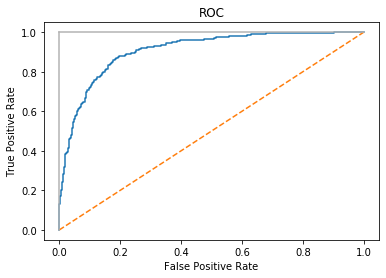

In [68]:
# Load libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Generate features matrix and target vector
X, y =make_classification(n_samples=10000,
                          n_features=10,
                          n_informative=3,
                          n_classes=2,
                          random_state=3)

# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(
                                                            X, y, test_size=0.1, random_state=1)


# Create logistic regression
logit = LogisticRegression()

# Train model
logit.fit(features_train, target_train)

# Get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]

# Create true and false positive rates
fp_rate, tp_rate, threshold = roc_curve(target_test, target_probabilities)

# Plot ROC curve
plt.title("ROC")
plt.plot(fp_rate, tp_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7")
plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## Evaluating Multiclass Classifier Predictions

In [72]:
# Load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate features matrix and target vector
# Generate features matrix and target vector
features, target =make_classification(n_samples=10000,
                          n_features=3,
                          n_informative=3,
                          n_classes=3,
                          random_state=1,
                            n_redundant=0)

# Create logistic regression
logit = LogisticRegression()

# cross-validate model using accuracy
cross_val_score(logit, features, target, scoring="accuracy")

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWar

array([0.83653269, 0.8259826 , 0.81308131])

When we have balanced dataset, accuracy can work well for every class as a metric.
But when we have imbalanced dataset, we should other metrics like f1_score, recall, precision even actually they were created for binary classification.

We will treat them as a set of binary classes. Doing so enables us to apply the metrics to each class as if it were the only class in data, and then aggregate the evaluation scores for all the classes by averaging them.

In [79]:
# cross-validate model using accuracy
cross_val_score(logit, features, target, scoring="f1_macro")

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWar

array([0.83613125, 0.82562258, 0.81293539])

## Visualizing a Classifier's Performance

In [80]:
# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# Load data
iris = datasets.load_iris()

# Create feature matrix
feature = iris.data

# Create target vector
target = iris.target

# Create list of target class names
class_names = iris.target_names

# Creating train and test set
features_train, features_test, target_train, target_test = train_test_split(
                                                            features, target, random_state=1)

# Create logistic regression
classifier = LogisticRegression()

# Train model and make predictions
target_predicted = classifier.fit(features_train, target_train).predict(features_test)

# Create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

# Create pandas dataframe
df = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(df, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

ModuleNotFoundError: No module named 'seaborn'

Each column of the matrix represents predicted class, while every row shows true classes.

## Evaluating Regression Models

Using Mean Squared Error

In [82]:
# Load libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Generate features matrix, target vector
features, target = make_regression(n_samples=100,
                                   n_features=3,
                                   n_informative=3,
                                   n_targets=1,
                                   noise=50,
                                   coef=False,
                                   random_state=1)

# Create a linear regression object
ols = LinearRegression()

# Cross-validate the linear regression using negative MSE
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([-1718.22817783, -3103.4124284 , -1377.17858823])

The higher the value of MSE, the greater the total squared erro and thus the worse the model.

**Squaring penalizes a few large errors more than many small errors, even if the absolute value of the errors is the same.

In [83]:
# Alternatively
# Cross-validate the linear regression using R-squared
cross_val_score(ols, features, target, scoring='r2')

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.87804558, 0.76395862, 0.89154377])

## Evaluating Clustering Models

## Creating a Custom Evaluation Metric

## Visualizing the Effect of Training Set Size

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/burak/anaconda3/envs/mlwithpython/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

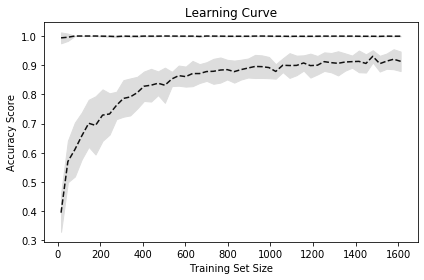

In [87]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

# Load data
digits = load_digits()

# Create feature matrix and target vector
features, target = digits.data, digits.target

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), # classifier
                                                        features,
                                                        target,
                                                        cv=10, # number of folds
                                                        scoring="accuracy", # perfomance metric
                                                        n_jobs=-10, # use all cpu's
                                                        train_sizes=np.linspace(0.01, 1.0, 50) # training set
                                                       )

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, '--', color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.show()

## Creating a Text Report of Evaluation Metrics

In [88]:
# Load libraries
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load digits dataset
iris = datasets.load_iris()

# Create feature matrix
features = iris.data

# Create target vector
target = iris.target

# Create list of target class names
class_names = iris.target_names

features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)

# Create logistic regression object
classifier = LogisticRegression()

# Train model and make predictions
model = classfier.fit(features_train, target_train)
target_predicted = model.predict(features_test)

# Create a classification report
print(classification_report(target_test, target_predicted, target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

